<h1><center> ComS 573     </center></h1>
<h1><center> Lab 3 </center></h1>
<h1><center> Kanak Choudhury </center></h1>

# Problem 1

python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
numpy 1.16.5
sklearn 0.21.3
graphviz 0.13.2
IPython 7.8.0
PIL 6.2.0 




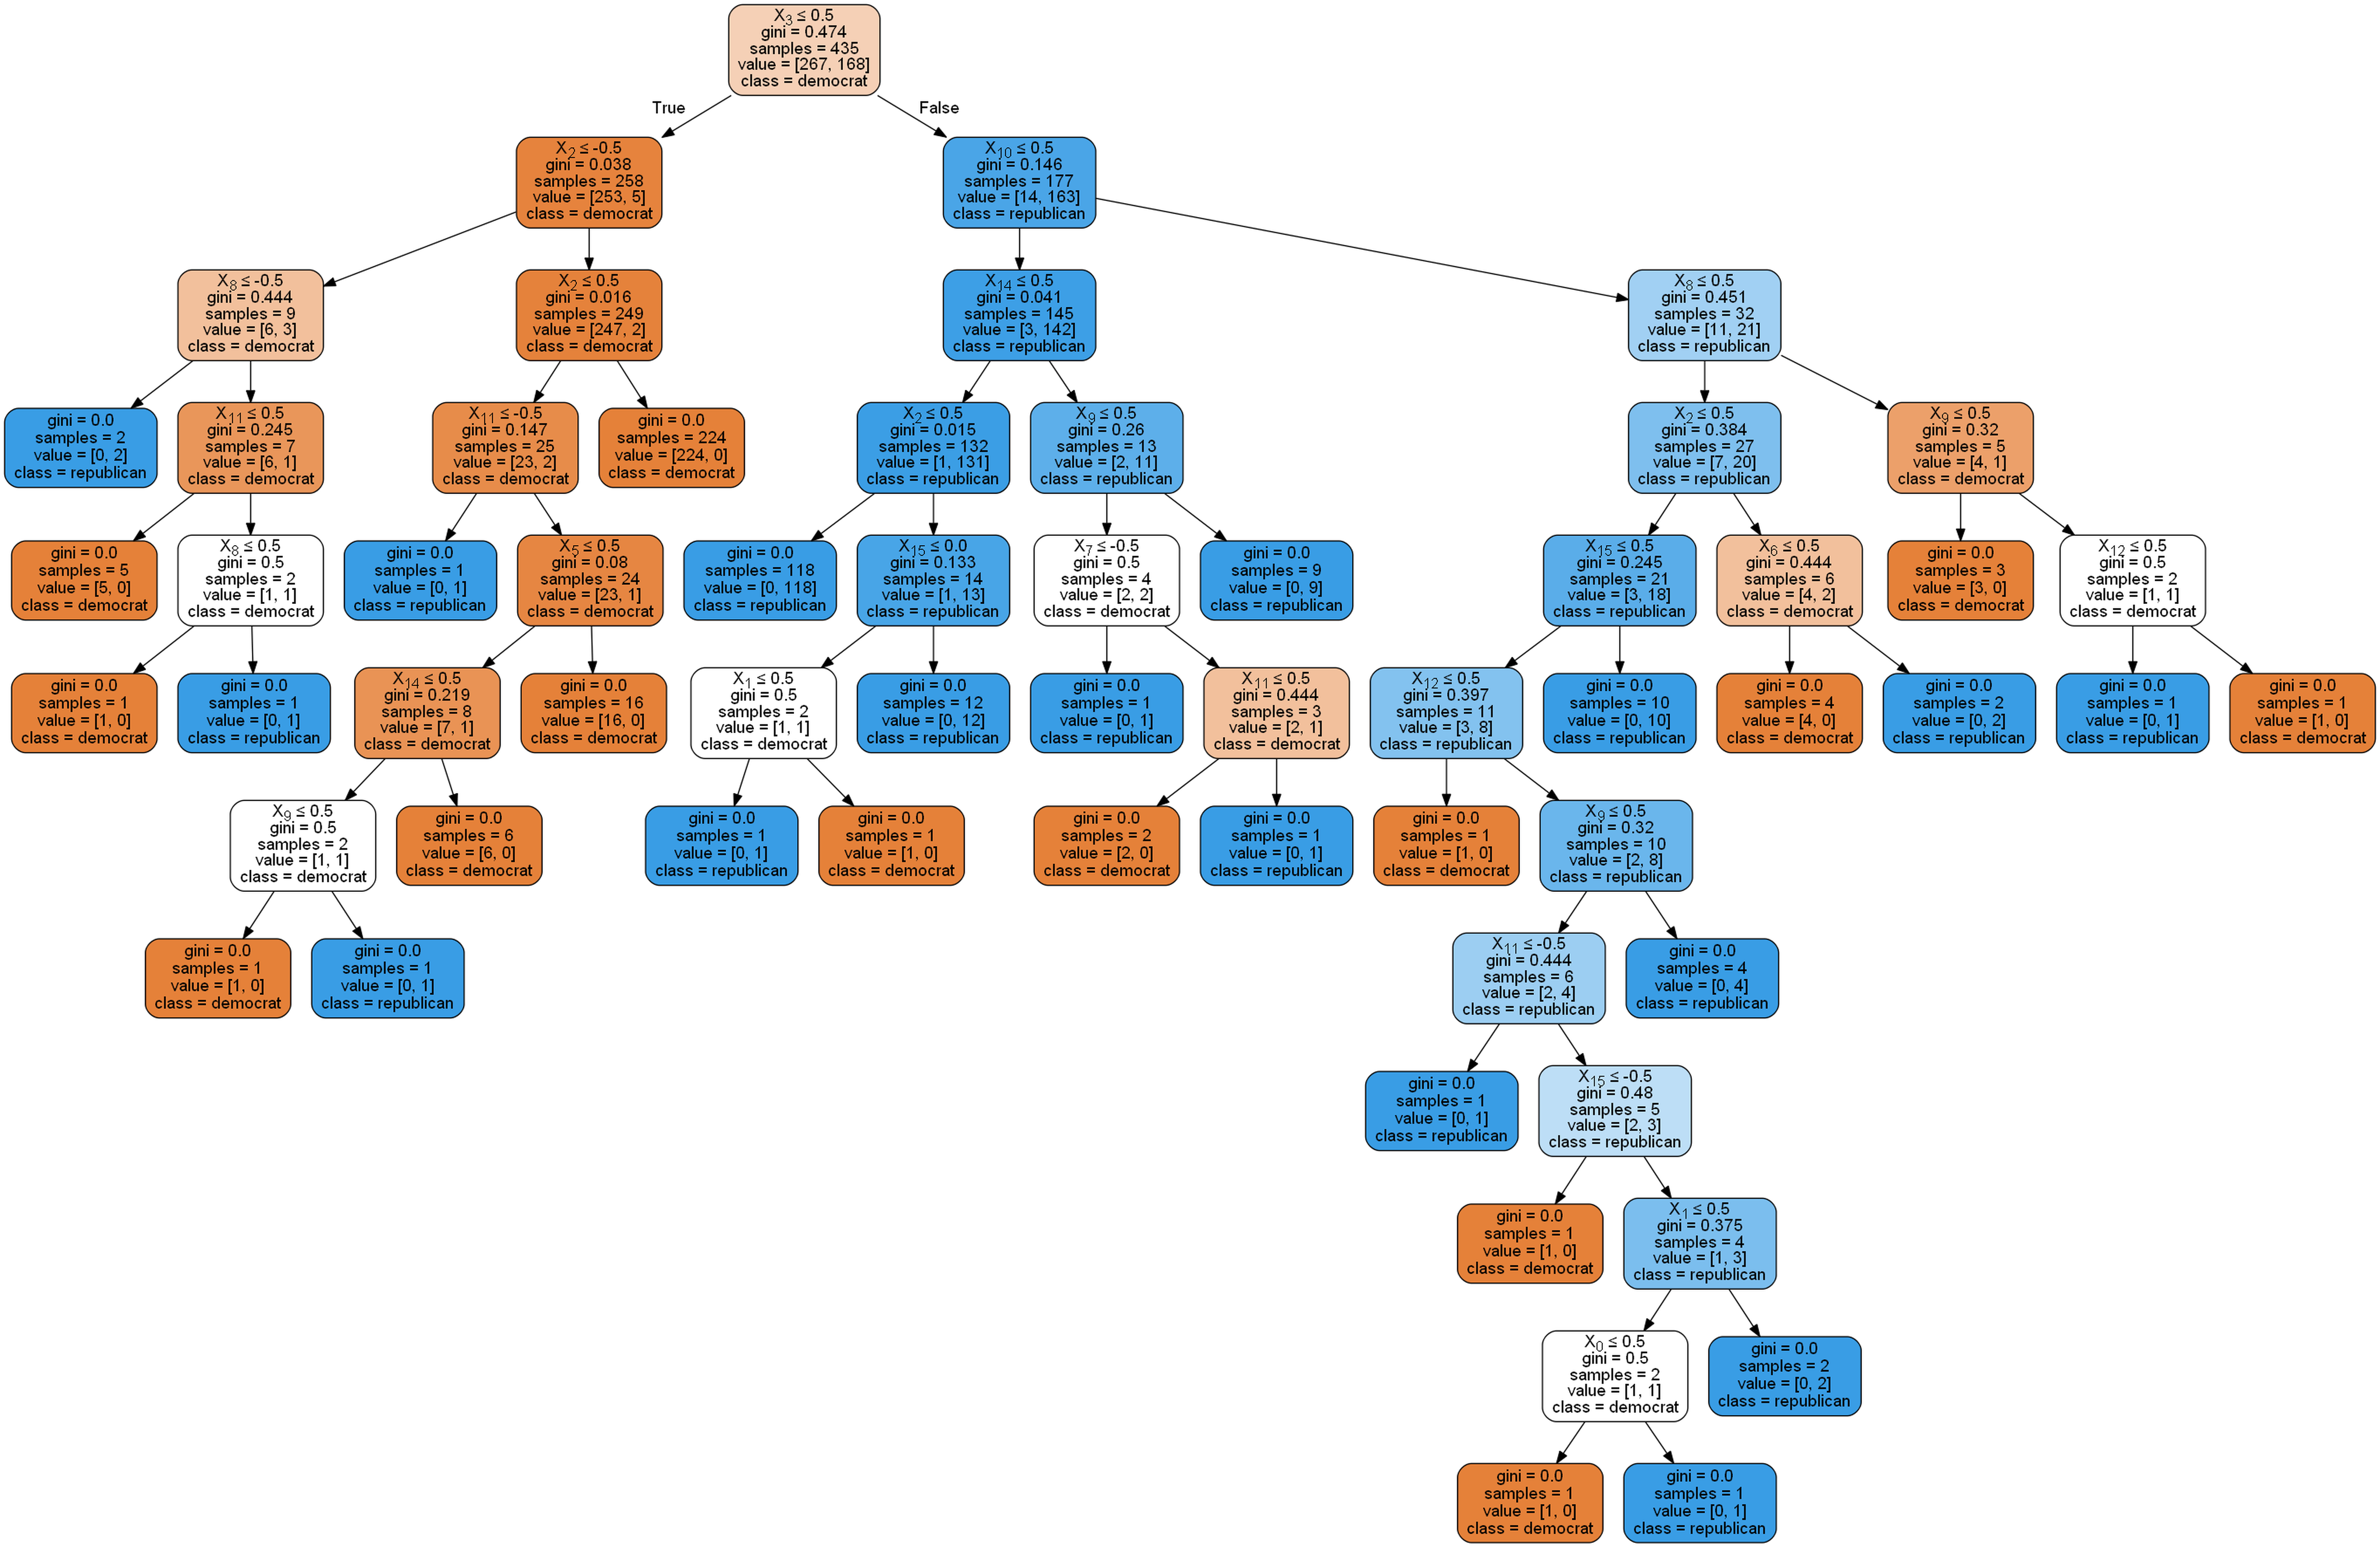

In [59]:
import numpy as np
import sklearn
from sklearn import tree
import graphviz
import IPython
import PIL
from IPython.display import display, Image
from sklearn.impute import SimpleImputer
from PIL import Image as imm
import pydotplus
import os
import sys
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

print('python ' +sys.version)
print('numpy '+ np.__version__)
print('sklearn '+ sklearn.__version__)
print('graphviz '+ graphviz.__version__)
print('IPython '+ IPython.__version__)
print('PIL '+ PIL.__version__,'\n\n')

data = open('house-votes-84.data','r').read().splitlines();
dt_size = np.shape(data);
dt_x = np.zeros([dt_size[0],16]);
dt_y = [];      

for i in range(0,dt_size[0]):
    aa = data[i].split(',')
    dt_y.append('republican' if aa[0]=='republican' else 'democrat')
    dt_x[i,:] = [-1 if aa[x+1]=='?' else 1 if aa[x+1]=='y' else 0 for x in range(0,16)]

dt_y = np.asarray(dt_y)
# impute = SimpleImputer(missing_values=-1, strategy='most_frequent')
# impute.fit(dt_x)
# dt_x = impute.transform(dt_x)

ctree = tree.DecisionTreeClassifier()
ctree = ctree.fit(dt_x, dt_y)

tree_pp = tree.export_graphviz(ctree, out_file = None, feature_names = dt_x.dtype.names, 
                            class_names=['democrat','republican'], 
                            filled=True, rounded=True,  
                            special_characters=True)
tree_plot = pydotplus.graph_from_dot_data(tree_pp)
# tree_plot.write_pdf("Q1_tree.pdf")
tree_plot.write_png("Q1_tree.png")
img_org = imm.open("Q1_tree.png")
width_org, height_org = img_org.size
factor = 1.5
width = int(width_org * factor)
height = int(height_org * factor)
img_anti = img_org.resize((width, height), imm.ANTIALIAS)
img_anti.save("Q1_tree.png")
display(img_anti)

### Missing Treatment: 

Since all the factors are binary categorical variables, mode imputation for the missing value might be a good idea. However, Since decision tree model can handle any number of categories, I have considered different category (-1) for all missing values.


In the data Set, we have 276 Democrat and 168 Republican response. Based on only physician-fee-freeze (No), adoption-of-the-budget-resolution (Yes) response it is possible to identify that they will support democrate (224, 83.9% of Democrate category). Similarly, if the responses are physician-fee-freeze (Yes), synfuels-corporation-cutback (No or Missing), duty-free-exports (No or Missing), adoption-of-the-budget-resolution (No or Missing) it is possible to identify them as Republican (118, 70.2% of republican category). That means most responses (224 and 118, 78.6% of total respondents) can be identify very quickly. For rest of the 22% respondents, the tree become large.